In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

In [2]:
data= pd.read_csv('Folds5x2_pp.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 9568


In [3]:
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

In [4]:
data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'RH', 'Output']
data.head()

,Avg_Temp,Vacuum,Avg_Pressure,RH,Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


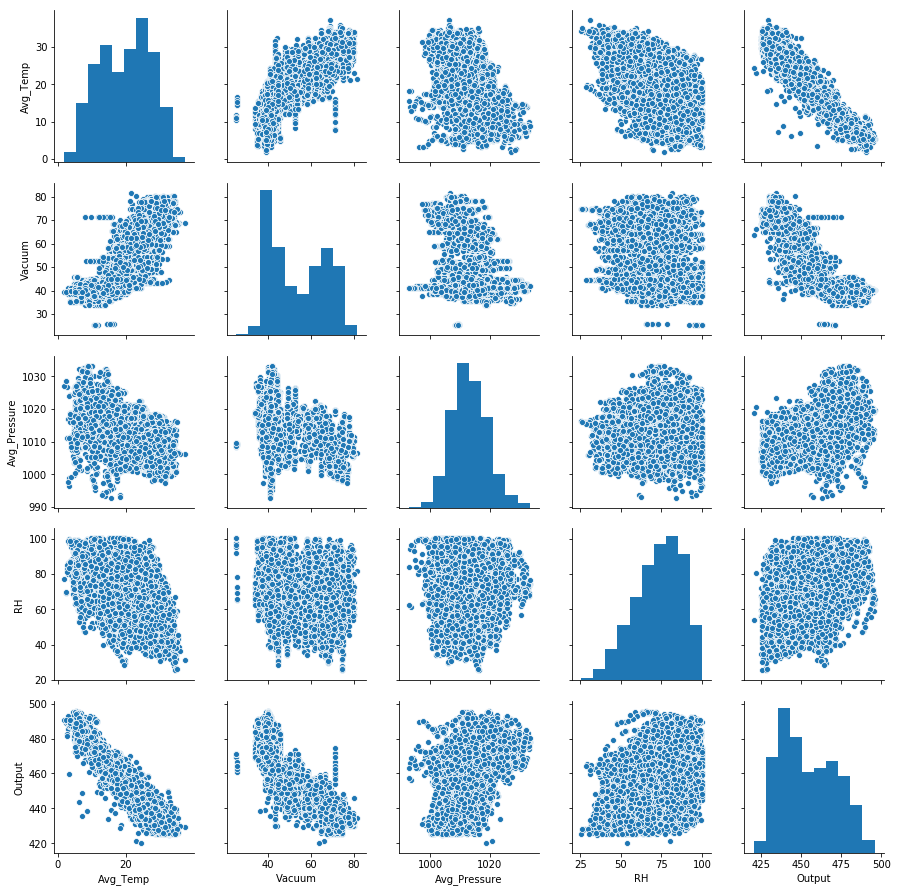

In [5]:
 sb.pairplot(data)

In [10]:
print (data.corr())

              Avg_Temp    Vacuum  Avg_Pressure        RH    Output
Avg_Temp      1.000000  0.844107     -0.507549 -0.542535 -0.948128
Vacuum        0.844107  1.000000     -0.413502 -0.312187 -0.869780
Avg_Pressure -0.507549 -0.413502      1.000000  0.099574  0.518429
RH           -0.542535 -0.312187      0.099574  1.000000  0.389794
Output       -0.948128 -0.869780      0.518429  0.389794  1.000000


In [11]:
data_test= data.ix[:,(2,3)].values
data_target= data.ix[:,1].values

data_test_names= ['Avg_Pressure', 'Output']
X, Y= scale(data_test), data

C:\Users\NAFIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\NAFIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [14]:
missing=X==np.NAN
X[missing==True]

array([], dtype=float64)

In [17]:
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.score(X,Y))

0.5653752579839956
